# Pennylane codebook I.11.

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num_wires = 3
dev = qml.device("default.qubit", wires = num_wires)

@qml.qnode(dev)
def make_basis_state(basis_id):
    binary = np.binary_repr(basis_id, width = num_wires)
    
    for i in range(num_wires):
        if binary[i] == '1':
            qml.PauliX(wires = i)

    return qml.state()

In [4]:
binary = np.binary_repr(3, width=3)
binary[0]

'0'

In [ ]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def two_qubit_circuit():

    qml.Hadamard(wires = 0)
    qml.PauliX(wires = 1)

    return [qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(1))]

In [5]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def create_one_minus():
    
    qml.PauliX(wires = 0)
    qml.PauliX(wires = 1)
    qml.Hadamard(wires = 1)

    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1))

print(create_one_minus())

0.9999999999999996


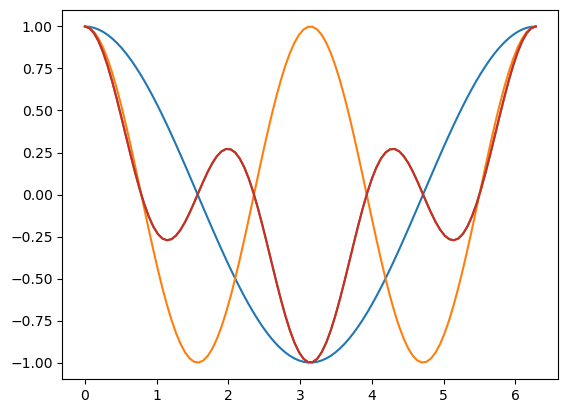

In [12]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def circuit_1(theta):

    qml.RX(theta, wires = 0)
    qml.RY(2*theta, wires = 1)

    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

@qml.qnode(dev)
def circuit_2(theta):

    qml.RX(theta, wires = 0)
    qml.RY(2*theta, wires = 1)

    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

def zi_iz_combination(ZI_results, IZ_results):
    
    combined_results = np.zeros(len(ZI_results))

    combined_results = ZI_results * IZ_results

    return combined_results

theta = np.linspace(0, 2*np.pi, 100)

circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

ZZ_results = np.array([circuit_2(t) for t in theta])

plt.plot(theta, ZI_results) 
plt.plot(theta, IZ_results)
plt.plot(theta, ZZ_results)
plt.plot(theta, combined_results)

plt.show()